In [20]:
import json
import matplotlib.pyplot as plt
import os
import math

DATASET_PATH = "../datasets/ariths_gen_100_high_prec_augmented/train"

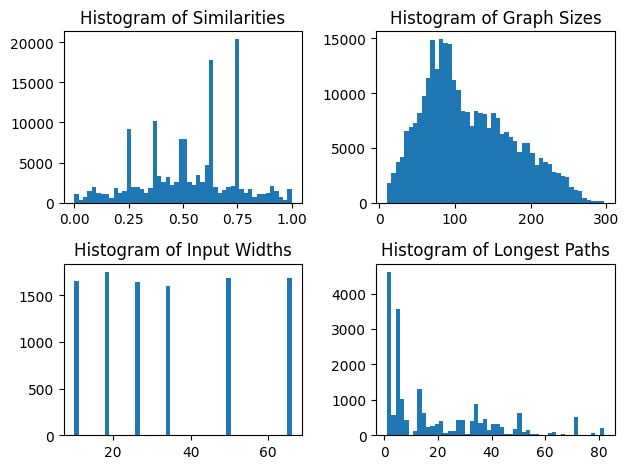

In [21]:
with open(os.path.join(DATASET_PATH, "metadata.json"), "r") as f:
    stats = json.load(f)
    
similarity = []
sizes = []
for sample in stats["similarity"]:
    similarities = [x[-1] for x in sample]
    first = [x[0] for x in sample]
    second = [x[1] for x in sample]
    sizes.extend(first)
    sizes.extend(second)
    similarity.extend(similarities)
stats["similarity"] = similarity
stats["graph_size"] = sizes
    
    
fig, axs = plt.subplots(2, 2)

# Create a histogram for the "similarity" statistic
axs[0, 0].hist(stats['similarity'], bins=50)
axs[0, 0].set_title('Histogram of Similarities')

# Create a histogram for the "graph_size" statistic
axs[0, 1].hist(stats['graph_size'], bins=50)
axs[0, 1].set_title('Histogram of Graph Sizes')

# Create a histogram for the "input_width" statistic
axs[1, 0].hist(stats['input_width'], bins=50)
axs[1, 0].set_title('Histogram of Input Widths')

# Create a histogram for the "longest_path" statistic
axs[1, 1].hist(stats['longest_path'], bins=50)
axs[1, 1].set_title('Histogram of Longest Paths')
fig.tight_layout()

In [22]:
# Estimation of intrinsic error of dataset
# Ground truth was obtained by simulation with N steps
# which means has built in error and model trained on this dataset
# can never achieve zero error
#
est_error = []
steps = stats["simulation_steps"]
for sim in stats["similarity"]:
    est_error.append(
        math.sqrt(steps * sim * (1 - sim)) / steps # variance of binomial distribution
    ) 

print(sum(est_error)/len(est_error))

0.004388678625382031
